# EXPLORATORY DATA ANALYSIS

![sales-prediction](exploratory-explanatory-862x451.png)

Here, we will be exploring the data to identify trends and outliers. 

We have some questions that we will be trying to answer , 
+ like which products were top top sellers. 
+ Are: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
+ Stores located in densely populated areas should have higher sales because of more demand.
+ Stores located within popular marketplaces should have higher sales because of better access to customers.
+ Established stores often enjoy higher sales compared to newer ones because customers tend to trust and purchase from familiar vendors.
+ Products which are given bigger shelves in the store are likely to catch attention first and sell more.
+ The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

Remember that the data might not be sufficient to test all of these, but forming these gives us a better understanding of the problem and we can even look for open source information if available.

Lets move on to the data exploration where we will have a look at the data in detail.

But a big part of exploratory analysis is … well, just exploring, looking to see what happened and what seems noteworthy. 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mode

In [2]:
# load the data (cleaned)
bigmart = pd.read_csv('bigmart_cleaned.csv')

bigmart_copy = bigmart.copy() # create a copy of the data
bigmart_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Category,Item_MRP_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,Very High
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drink,Low
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,High
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food,High
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,Low


## Univariate Analysis

### 1. Distribution of Numerical Columns with Histogram

Observations:

+ We observe that the item weight range from 5 Kg to 23 Kg.
+ Item_Visibility and Item_Outlet-Sales feature is right skewed. We can may be try to do a transformation in order to obtain a normal ou Gaussian distribution
+ There are more products in the range of 100 MRP - 180 MRP in the Item_MRP feature
+ We can observe that a lots of stores have been established in the years 1985, 1998 etc... and there was no store establishment between 1989 and 1996.
+ It can be aslo be see that Item Weight and Item MRP follows a normal distribution aproximately.

In [3]:
# create a list of numeric columns
numeric_cols = bigmart_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Outlet_Age']

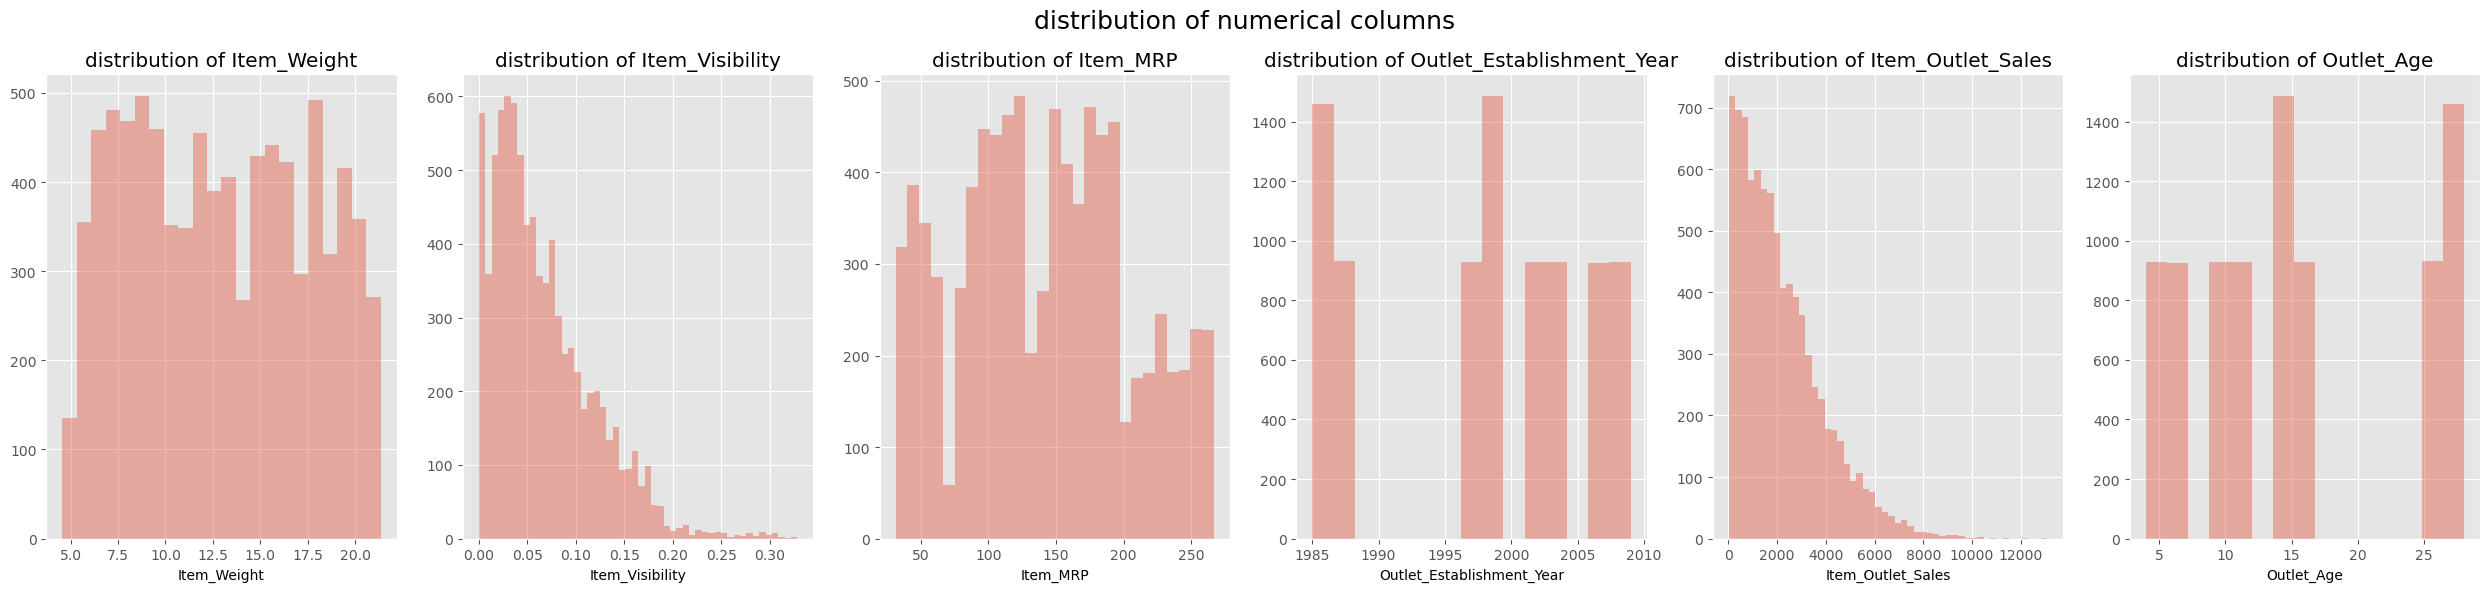

In [4]:
# create a suplot
_, ax = plt.subplots(nrows =1, ncols= 6,
                    figsize = (25, 6))

# create a distribution plot setting KDE = True
for index, col in enumerate(numeric_cols):
    sns.distplot(bigmart_copy[col], kde = False, ax = ax[index])
    ax[index].set_title(f"distribution of {col}")
    #ax.ylabel(f'number of entries per category or values')
    _.suptitle('distribution of numerical columns', fontsize = 18)
    plt.tight_layout()

 ### 2.  Distribution of Numerical Columns with Boxplot
 
 + majority of the outlet have been in existence betweeen 14 years and above
 + There are outliers in the Item_Visibility and Item_Outlet_Sales column. We will have to remove some outliers
 + Vlaues in the Item_Weight and Item_MRP column seems to be evenly distributed as confirmed before.

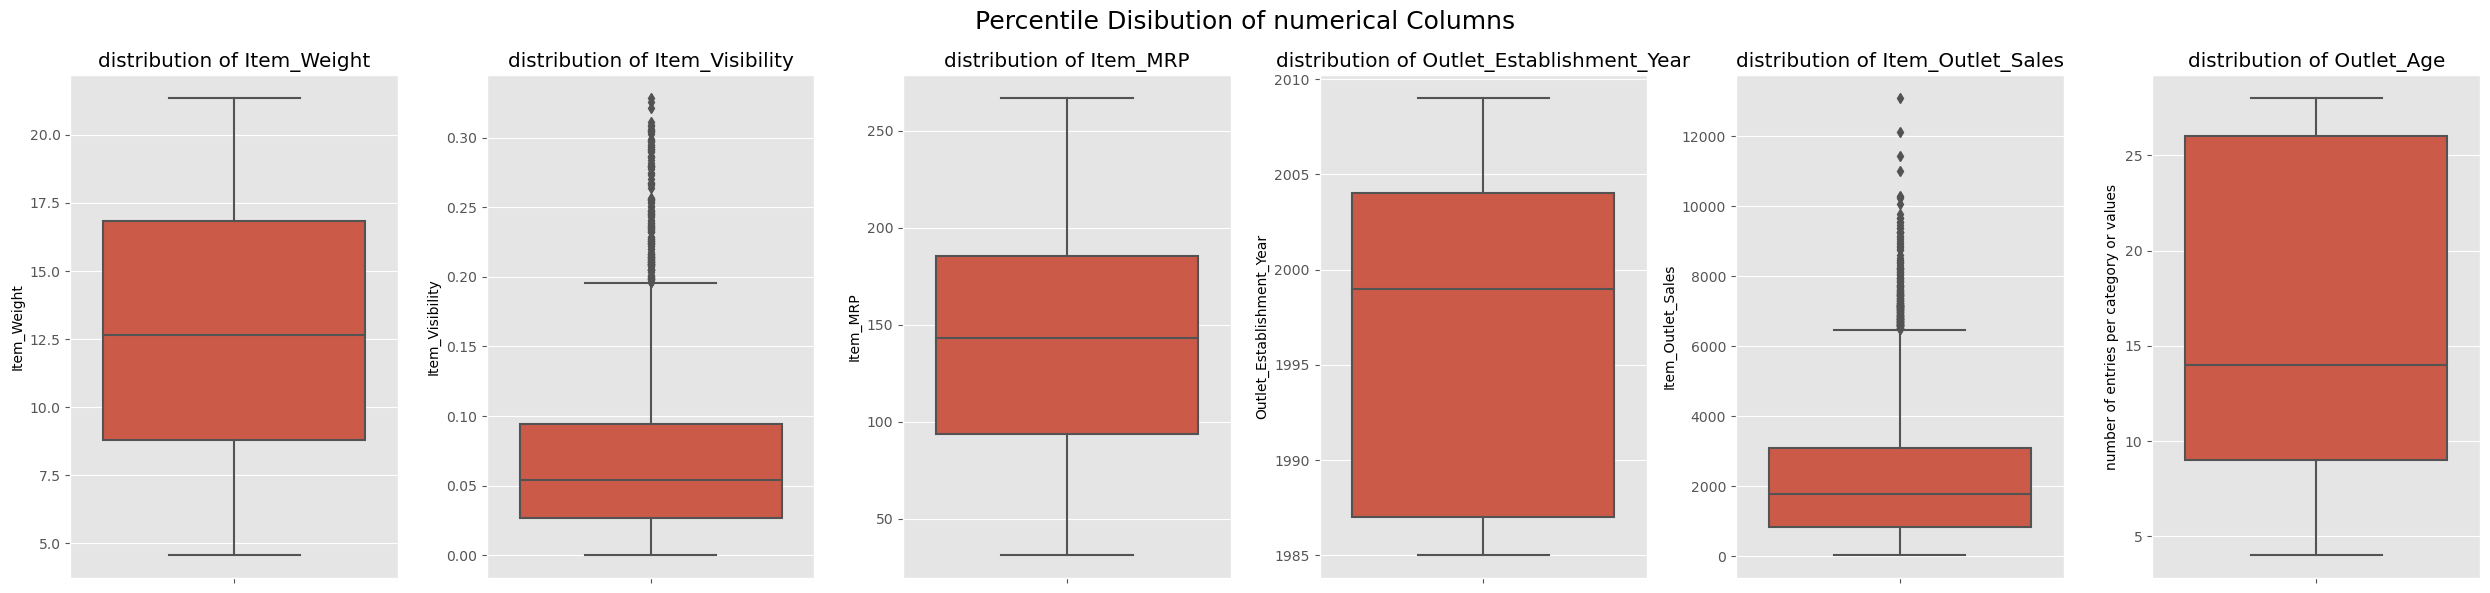

In [5]:
# create a suplot
_, ax = plt.subplots(nrows =1, ncols= 6,
                    figsize = (25, 6))

# create a distribution plot setting KDE = True
for index, col in enumerate(numeric_cols):
    sns.boxplot(bigmart_copy, y = col, ax = ax[index])
    ax[index].set_title(f"distribution of {col}")
    plt.ylabel('number of entries per category or values')
    _.suptitle('Percentile Disibution of numerical Columns', fontsize = 18)
    plt.tight_layout()

### 3. Proportion of Values for each Category Variable
Observation:
+ Food represent the bulk of what people purchase which is not suprising as it is the most essential needs of a human
+ There are more low fat products being purchased compared to the regular fat or non-edible product. This might be due to the fact that the customer is trying to be health conscious as fat is believed to lead to obesity and some other diseases
+ Super Market Type 1 has more purchasing prowess compared to other type of supermarket maybe due to the fact that it is more closer to residential areas 

most of these observation will be investigated further to ascertain some assuptions

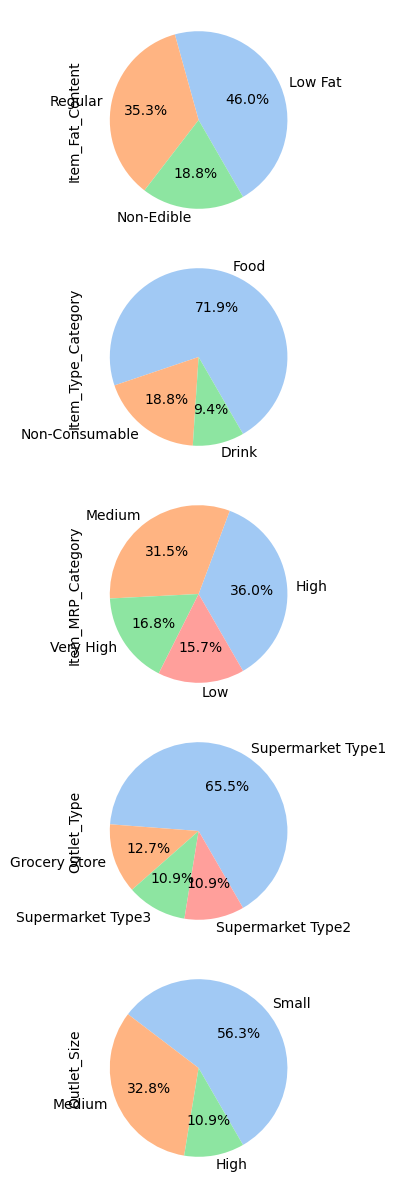

In [56]:
for i, var in enumerate(cat_columns):
    plt.subplot(len(cat_columns), 1, i+1)
    bigmart_copy[var].value_counts().plot.pie(fontsize=10, figsize=(20,12), autopct="%.1f%%",
                                             colors = sns.color_palette('pastel'), startangle = -60)
    plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

## BiVariate Analysis

### 1. 